## Telecom churn case study

### Problem Statement

####  In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
#### For many incumbent operators, retaining high profitable customers is the number one business goal.
#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
#### In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
telkom_df = pd.read_csv("telecom_churn_data.csv")

In [80]:
# look at initial rows of the data
telkom_df.head(10)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_avg_6_7,rech_date_diff_8_7,rech_date_diff_7_6,churn
0,197.385,214.816,213.803,280.143527,290.724523,0.00,397.971199,407.279645,0.00,0.00,...,30.40,0.00,101.20,3.58,614.0,504.0,559.0,23.0,25.0,1
7,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.23,...,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,32.0,28.0,1
8,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.00,...,21.03,910.65,122.16,0.00,437.0,778.0,607.5,30.0,36.0,0
16,430.975,299.869,187.894,50.510000,74.010000,70.61,296.290000,229.740000,162.76,0.00,...,0.00,2.45,21.89,0.00,570.0,348.0,459.0,14.0,31.0,0
21,514.453,597.753,637.760,102.410000,132.110000,85.14,757.930000,896.680000,983.39,0.00,...,0.00,0.00,0.00,0.00,600.0,680.0,640.0,31.0,31.0,0
33,977.020,2362.833,409.230,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,...,358.10,2706.83,1714.67,0.00,2115.0,5359.0,3737.0,27.0,30.0,0
38,363.987,486.558,393.909,248.990000,619.960000,666.38,88.860000,50.580000,97.81,0.00,...,0.00,0.00,0.00,0.00,420.0,636.0,528.0,27.0,28.0,0
41,482.832,425.764,229.769,86.390000,118.880000,80.44,232.360000,280.780000,136.69,0.00,...,0.00,0.00,0.00,0.00,496.0,510.0,503.0,40.0,28.0,0
48,1873.271,575.927,179.218,2061.690000,881.430000,156.91,1087.760000,258.290000,68.18,0.00,...,0.00,0.00,0.00,0.00,2317.0,580.0,1448.5,36.0,24.0,0
53,978.077,1141.296,706.020,135.140000,119.590000,102.69,479.310000,543.180000,261.34,0.00,...,0.00,0.00,0.00,0.00,1245.0,1487.0,1366.0,26.0,32.0,0


In [81]:
# dataframe shape
telkom_df.shape

(28852, 155)

In [3]:
#Droping  mobile_number because it won't have any effect
telkom_df = telkom_df.drop(['mobile_number','circle_id'] ,axis=1)

In [82]:
#Checking info of data 
telkom_df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28852 entries, 0 to 99997
Data columns (total 155 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         float64
 4   onnet_mou_7         float64
 5   onnet_mou_8         float64
 6   offnet_mou_6        float64
 7   offnet_mou_7        float64
 8   offnet_mou_8        float64
 9   roam_ic_mou_6       float64
 10  roam_ic_mou_7       float64
 11  roam_ic_mou_8       float64
 12  roam_og_mou_6       float64
 13  roam_og_mou_7       float64
 14  roam_og_mou_8       float64
 15  loc_og_t2t_mou_6    float64
 16  loc_og_t2t_mou_7    float64
 17  loc_og_t2t_mou_8    float64
 18  loc_og_t2m_mou_6    float64
 19  loc_og_t2m_mou_7    float64
 20  loc_og_t2m_mou_8    float64
 21  loc_og_t2f_mou_6    float64
 22  loc_og_t2f_mou_7    float64
 23  loc_og_t2f_mou_8    float64
 24  loc_og_t2c_mou_6    float64

In [84]:
# data statistics
telkom_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_avg_6_7,rech_date_diff_8_7,rech_date_diff_7_6,churn
count,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000,28852.00000,28852.000000,28852.000000,28852.000000,28852.000000,...,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000,28852.000000
mean,573.364815,584.079420,537.614179,280.143527,290.724523,261.43796,397.971199,407.279645,369.770238,16.785493,...,168.271493,175.632719,154.295208,7.776189,799.665559,818.721555,809.193557,30.403011,30.879822,0.061729
std,440.639603,470.720964,497.308953,456.952644,482.525920,466.20082,472.384441,493.408841,480.247263,77.969983,...,423.579011,447.524657,417.251236,51.999275,598.196980,633.773879,547.549621,5.585378,5.291576,0.240667
min,-2258.709000,-622.509000,-345.129000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,1.000000,1.000000,0.000000
25%,345.244250,351.865000,280.839500,29.790000,29.130000,23.41000,106.730000,105.252500,84.427500,0.000000,...,0.000000,0.000000,0.000000,0.000000,500.000000,504.000000,524.500000,28.000000,29.000000,0.000000
50%,488.490500,492.158500,452.509000,110.725000,108.810000,93.86000,261.860000,261.785000,234.920000,0.000000,...,0.000000,0.000000,0.000000,0.000000,667.000000,677.000000,659.500000,31.000000,31.000000,0.000000
75%,697.507750,703.817500,675.756250,320.305000,328.237500,275.77750,505.422500,518.015000,470.432500,0.000000,...,115.170000,114.145000,76.275000,0.000000,954.000000,973.000000,916.500000,33.000000,33.000000,0.000000
max,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.56000,8362.360000,9667.130000,14007.340000,2613.310000,...,12916.220000,9165.600000,11166.210000,2618.570000,35190.000000,40335.000000,37762.500000,61.000000,60.000000,1.000000


### Taking care of missing values in the given data set

In [4]:
# summing up the missing values (column-wise)
missing_per_df = round(100*(telkom_df.isnull().sum()/len(telkom_df.index)), 2).reset_index()
major_column_missing = missing_per_df[missing_per_df[0] > 50]['index']

In [5]:
#dropping columns with more than 90% missing values.
telkom_df.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],axis =1, inplace=True)

In [6]:
missing_per_df = round(100*(telkom_df.isnull().sum()/len(telkom_df.index)), 2).reset_index()
major_column_missing = missing_per_df[missing_per_df[0] > 50]['index']

In [7]:
#calculating null values and replacing them with 0.
major_numeric_column_missing=[]
for col in major_column_missing:
    if(np.issubdtype(telkom_df[col].dtype, np.number)):
        major_numeric_column_missing.append(col)



for col in major_numeric_column_missing:
    telkom_df[col] = telkom_df[col].fillna(0)

In [8]:
#creating new column with total amount (data + calling) for 6th and 7th month.
telkom_df['total_rech_6'] = telkom_df['total_rech_amt_6'] +telkom_df['av_rech_amt_data_6']
telkom_df['total_rech_7'] = telkom_df['total_rech_amt_7'] +telkom_df['av_rech_amt_data_7']
telkom_df['total_rech_avg_6_7'] = (telkom_df['total_rech_6'] + telkom_df['total_rech_7'])/2

In [9]:
#filtering high value customers(hvc) with 70% quantile.
telkom_df['total_rech_avg_6_7'].quantile(0.7)
telkom_df = telkom_df.loc[telkom_df['total_rech_avg_6_7'] >= telkom_df['total_rech_avg_6_7'].quantile(0.7)]

In [10]:
#dropping data columns which have more than 10% missing values.
missing_per_df = round(100*(telkom_df.isnull().sum()/len(telkom_df.index)), 2).reset_index()
major_column_missing = missing_per_df[missing_per_df[0] > 10]['index']
print('Dropping columns with missing values more than 10% :',major_column_missing)
telkom_df.drop(major_column_missing,axis=1,inplace=True)


Dropping columns with missing values more than 10% : 155    date_of_last_rech_data_6
156    date_of_last_rech_data_7
157    date_of_last_rech_data_8
158    date_of_last_rech_data_9
Name: index, dtype: object


In [11]:
#Removing rows where values are null
telkom_df = telkom_df.loc[telkom_df['last_date_of_month_9'].notnull()]
telkom_df = telkom_df = telkom_df.loc[telkom_df['date_of_last_rech_8'].notnull()]
telkom_df = telkom_df = telkom_df.loc[telkom_df['date_of_last_rech_9'].notnull()]

In [12]:
#filling all null values to average.
# If percentage of zeros in column is more than 50% than fill null values with 0 otherwise fill them with mean.

missing_per_df = round(100*(telkom_df.isnull().sum()/len(telkom_df.index)), 2).reset_index()
major_column_missing = missing_per_df[missing_per_df[0] > 1]['index']

for col in major_column_missing:
    if((telkom_df.loc[telkom_df[col] == 0].shape[0]/telkom_df.shape[0])*100 > 50 ):
        telkom_df[col] = telkom_df[col].fillna(0)
    else:
        telkom_df[col] = telkom_df[col].fillna(telkom_df[col].mean())


missing_per_df = round(100*(telkom_df.isnull().sum()/len(telkom_df.index)), 2).reset_index()
major_column_missing = missing_per_df[missing_per_df[0] > 1]['index']

print('Number of columns missing values: ', major_column_missing)
print('Final Data shape : ',telkom_df.shape)

Number of columns missing values:  Series([], Name: index, dtype: object)
Final Data shape :  (28852, 219)


In [13]:
#dropping columns with low variance
telkom_df.var() < 1
col_low_variance = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_6',
                    'last_date_of_month_7','last_date_of_month_8','std_og_t2c_mou_6','std_og_t2c_mou_7',
                    'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
telkom_df = telkom_df.drop(col_low_variance,axis = 1)

In [14]:
#feature engineering date_of_last_rech_6,date_of_last_rech_7 and date_of_last_rech_8 to two new columns
#rech_date_diff_7_6 and rech_date_diff_8_7 where rech_diff_6_7 contains difference between date_of_last_rech_7 and date_of_last_rech_6 
# and rech_date_diff_8_7 contains difference between date_of_last_rech_7 and date_of_last_rech_8

print(telkom_df.dtypes['date_of_last_rech_6'])
telkom_df['date_of_last_rech_6'] = pd.to_datetime(telkom_df['date_of_last_rech_6'], format="%m/%d/%Y")
telkom_df['date_of_last_rech_7'] = pd.to_datetime(telkom_df['date_of_last_rech_7'], format="%m/%d/%Y")
telkom_df['date_of_last_rech_8'] = pd.to_datetime(telkom_df['date_of_last_rech_8'], format="%m/%d/%Y")
telkom_df['rech_date_diff_8_7'] = (telkom_df['date_of_last_rech_8'] - telkom_df['date_of_last_rech_7']).dt.days
telkom_df['rech_date_diff_7_6'] = (telkom_df['date_of_last_rech_7'] - telkom_df['date_of_last_rech_6']).dt.days

#filling NA with mean
telkom_df['rech_date_diff_8_7'] = telkom_df['rech_date_diff_8_7'].fillna(telkom_df['rech_date_diff_8_7'].mean())
telkom_df['rech_date_diff_7_6'] = telkom_df['rech_date_diff_7_6'].fillna(telkom_df['rech_date_diff_7_6'].mean())



#dropping date columns
telkom_df = telkom_df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

object


In [15]:
#Drop all the columns that only have a 0.
for col in telkom_df.columns:
    if ((telkom_df[col].max()==0) & (telkom_df[col].min()==0)):
        telkom_df.drop(col,axis=1,inplace=True)
        

In [16]:
#tagging step
# computing y(churn/not churn) : 
#    if user didn't used total incoming , outgoing and total 29 , 3g data then consider it as churned user. 

def isChurn(x1,x2,x3,x4):
    if((x1+x2)==0 and (x3+x4)==0):
        return 1
    else:
        return 0
    
telkom_df['churn'] = telkom_df.apply(lambda x: isChurn(x.total_ic_mou_9, x.total_og_mou_9,x.vol_2g_mb_9, x.vol_3g_mb_9), axis=1)
print('Churn Rate : ' ,((telkom_df['churn'] ==1).sum()/telkom_df.shape[0])*100)


Churn Rate :  6.172882295854707


In [17]:
#Drop all the 9th month columns now
ninth_month_cols = [col for col in telkom_df.columns if '_9' in col]
telkom_df = telkom_df.drop(columns=ninth_month_cols, axis=1)

In [85]:
#final shape of data frame
telkom_df.shape

(28852, 155)

In [54]:
#importing required modules

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import IncrementalPCA

### Model 1 : Logistic Regression

In [20]:
#train test split and over sampling
X = telkom_df.drop(['churn'],axis=1)
y = telkom_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
#scaling
Scaled_Xtrain = StandardScaler().fit_transform(X_train)

In [23]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(Scaled_Xtrain, y_train)
X_train.shape

(20196, 154)

In [24]:
# performing over sampling
Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

In [25]:
#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [26]:
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0     1
churn            
0      6886  1218
1        87   465

Classification paradox :------->>
Accuracy :-  84.92

Specificity //  True Negative Rate :-  84.97

Sensivity // True Positive Rate // Recall :-  84.24

False Negative Rate :-  15.76

False Postive Rate :-  15.03

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      8104
           1       0.28      0.84      0.42       552

    accuracy                           0.85      8656
   macro avg       0.63      0.85      0.66      8656
weighted avg       0.94      0.85      0.88      8656



### Model 2 : RFE with Logistic Regression.

In [27]:
X = telkom_df.drop(['churn'],axis=1)
y = telkom_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


In [28]:
#Getting numeric colums 
numeric_col = telkom_df.columns
category_columns = ['fb_user_6','fb_user_7','fb_user_8','churn','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
numeric_col = list(set(numeric_col) - set(category_columns))


In [29]:
#feature Scaling
X_train[numeric_col] = StandardScaler().fit_transform(X_train[numeric_col])

In [30]:
#model building  
#Running RFE (Recursice feature elimination) to get major kpi and than running statsmodel to get statistics.
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics

C:\Asheer\anaconda\lib\site-packages\patsy\constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [31]:
nokpi = [5,10,15]

#After running RFE we get to know that accuracy is almost same for number of kpi 5,10,15
# therefore choosing 10 which gives good accuracy.
for i in nokpi:
    print('when number of major KPI is : ', i)
    logreg = LogisticRegression()
    rfe = RFE(logreg,i)
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    print(col)
    X_train_sm = sm.add_constant(X_train[col])
    model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
    print('Summary :')
    print(model.summary())
    y_train_pred = model.predict(X_train_sm)
    y_train_pred[:10]

    y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index
    y_train_pred_final.head()

    y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
    y_train_pred_final.head()
    confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
    print('confusion matrix :')
    print(confusion)
    print('accuracy score :')
    print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

when number of major KPI is :  5
Index(['std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'fb_user_8'],
      dtype='object')
Summary :
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20196
Model:                            GLM   Df Residuals:                    20190
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3316.4
Date:                Sun, 23 Feb 2020   Deviance:                       6632.8
Time:                        15:35:01   Pearson chi2:                 1.94e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                       coef    std err       

In [32]:
#Accuracy is almost same for KPI number 5,10,15 therefore picking lowest that is 5
logreg = LogisticRegression()
rfe = RFE(logreg,5)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
print(col)
X_train_sm = sm.add_constant(X_train[col])
model_rfe = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
print('Summary :')
print(model_rfe.summary())
y_train_pred = model_rfe.predict(X_train_sm)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print('confusion matrix :')
print(confusion)
print('accuracy score :')
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
   

Index(['std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'fb_user_8'],
      dtype='object')
Summary :
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20196
Model:                            GLM   Df Residuals:                    20190
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3316.4
Date:                Sun, 23 Feb 2020   Deviance:                       6632.8
Time:                        15:37:05   Pearson chi2:                 1.94e+09
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      

In [33]:
#get variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def printVIF():
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

In [34]:
#All the VIF are acceptable
printVIF()

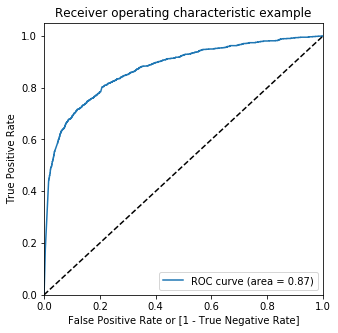

In [35]:
#drawing roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# The area under curve of the ROC is large therefore our model is acceptable

In [36]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
36987,1,0.655388,36987,1,1,1,1,1,1,1,1,0,0,0
60192,0,0.064727,60192,0,1,0,0,0,0,0,0,0,0,0
68798,0,0.088139,68798,0,1,0,0,0,0,0,0,0,0,0
78113,0,0.094811,78113,0,1,0,0,0,0,0,0,0,0,0
46003,0,0.016462,46003,0,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.060854  1.000000  0.000000
0.1   0.1  0.847247  0.736371  0.854431
0.2   0.2  0.922262  0.623271  0.941635
0.3   0.3  0.949000  0.460537  0.980651
0.4   0.4  0.945732  0.177380  0.995519
0.5   0.5  0.945732  0.177380  0.995519
0.6   0.6  0.945732  0.177380  0.995519
0.7   0.7  0.939146  0.000000  1.000000
0.8   0.8  0.939146  0.000000  1.000000
0.9   0.9  0.939146  0.000000  1.000000


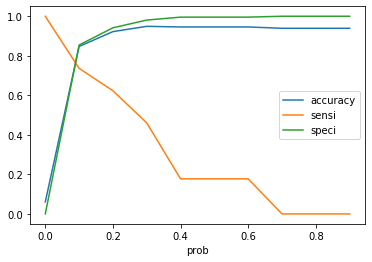

In [37]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#picking ideal cutoff as 0.1 as shown in below graph

In [38]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
print('final Accuracy :',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )

#sensitivity , specificity , False positive rate , positive predictive value, negative predictive value
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Sensitivity : ',TP / float(TP+FN))
print('Specificity : ',TN / float(TN+FP))
print('False postive rate : ',FP/ float(TN+FP))
print('Positive predictive value : ',TP / float(TP+FP))
print('Negative predictive value : ',TN / float(TN+ FN))

final Accuracy : 0.8472469795999208
Sensitivity :  0.7363710333604556
Specificity :  0.8544313808193178
False postive rate :  0.14556861918068223
Positive predictive value :  0.24686306601200217
Negative predictive value :  0.980399274047187


### Model 3 : Random Forest Classifier

In [39]:
#Random Forest Model
X = telkom_df.drop('churn',axis = 1)
y = telkom_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train,y_train)

rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      7848  256
1       211  341

Classification paradox :------->>
Accuracy :-  94.6

Specificity //  True Negative Rate :-  96.84

Sensivity // True Positive Rate // Recall :-  61.78

False Negative Rate :-  38.22

False Postive Rate :-  3.16

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8104
           1       0.57      0.62      0.59       552

    accuracy                           0.95      8656
   macro avg       0.77      0.79      0.78      8656
weighted avg       0.95      0.95      0.95      8656



In [40]:
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0     1
churn            
0      6813  1291
1       173   379

Classification paradox :------->>
Accuracy :-  83.09

Specificity //  True Negative Rate :-  84.07

Sensivity // True Positive Rate // Recall :-  68.66

False Negative Rate :-  31.34

False Postive Rate :-  15.93

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8104
           1       0.23      0.69      0.34       552

    accuracy                           0.83      8656
   macro avg       0.60      0.76      0.62      8656
weighted avg       0.93      0.83      0.87      8656



In [41]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

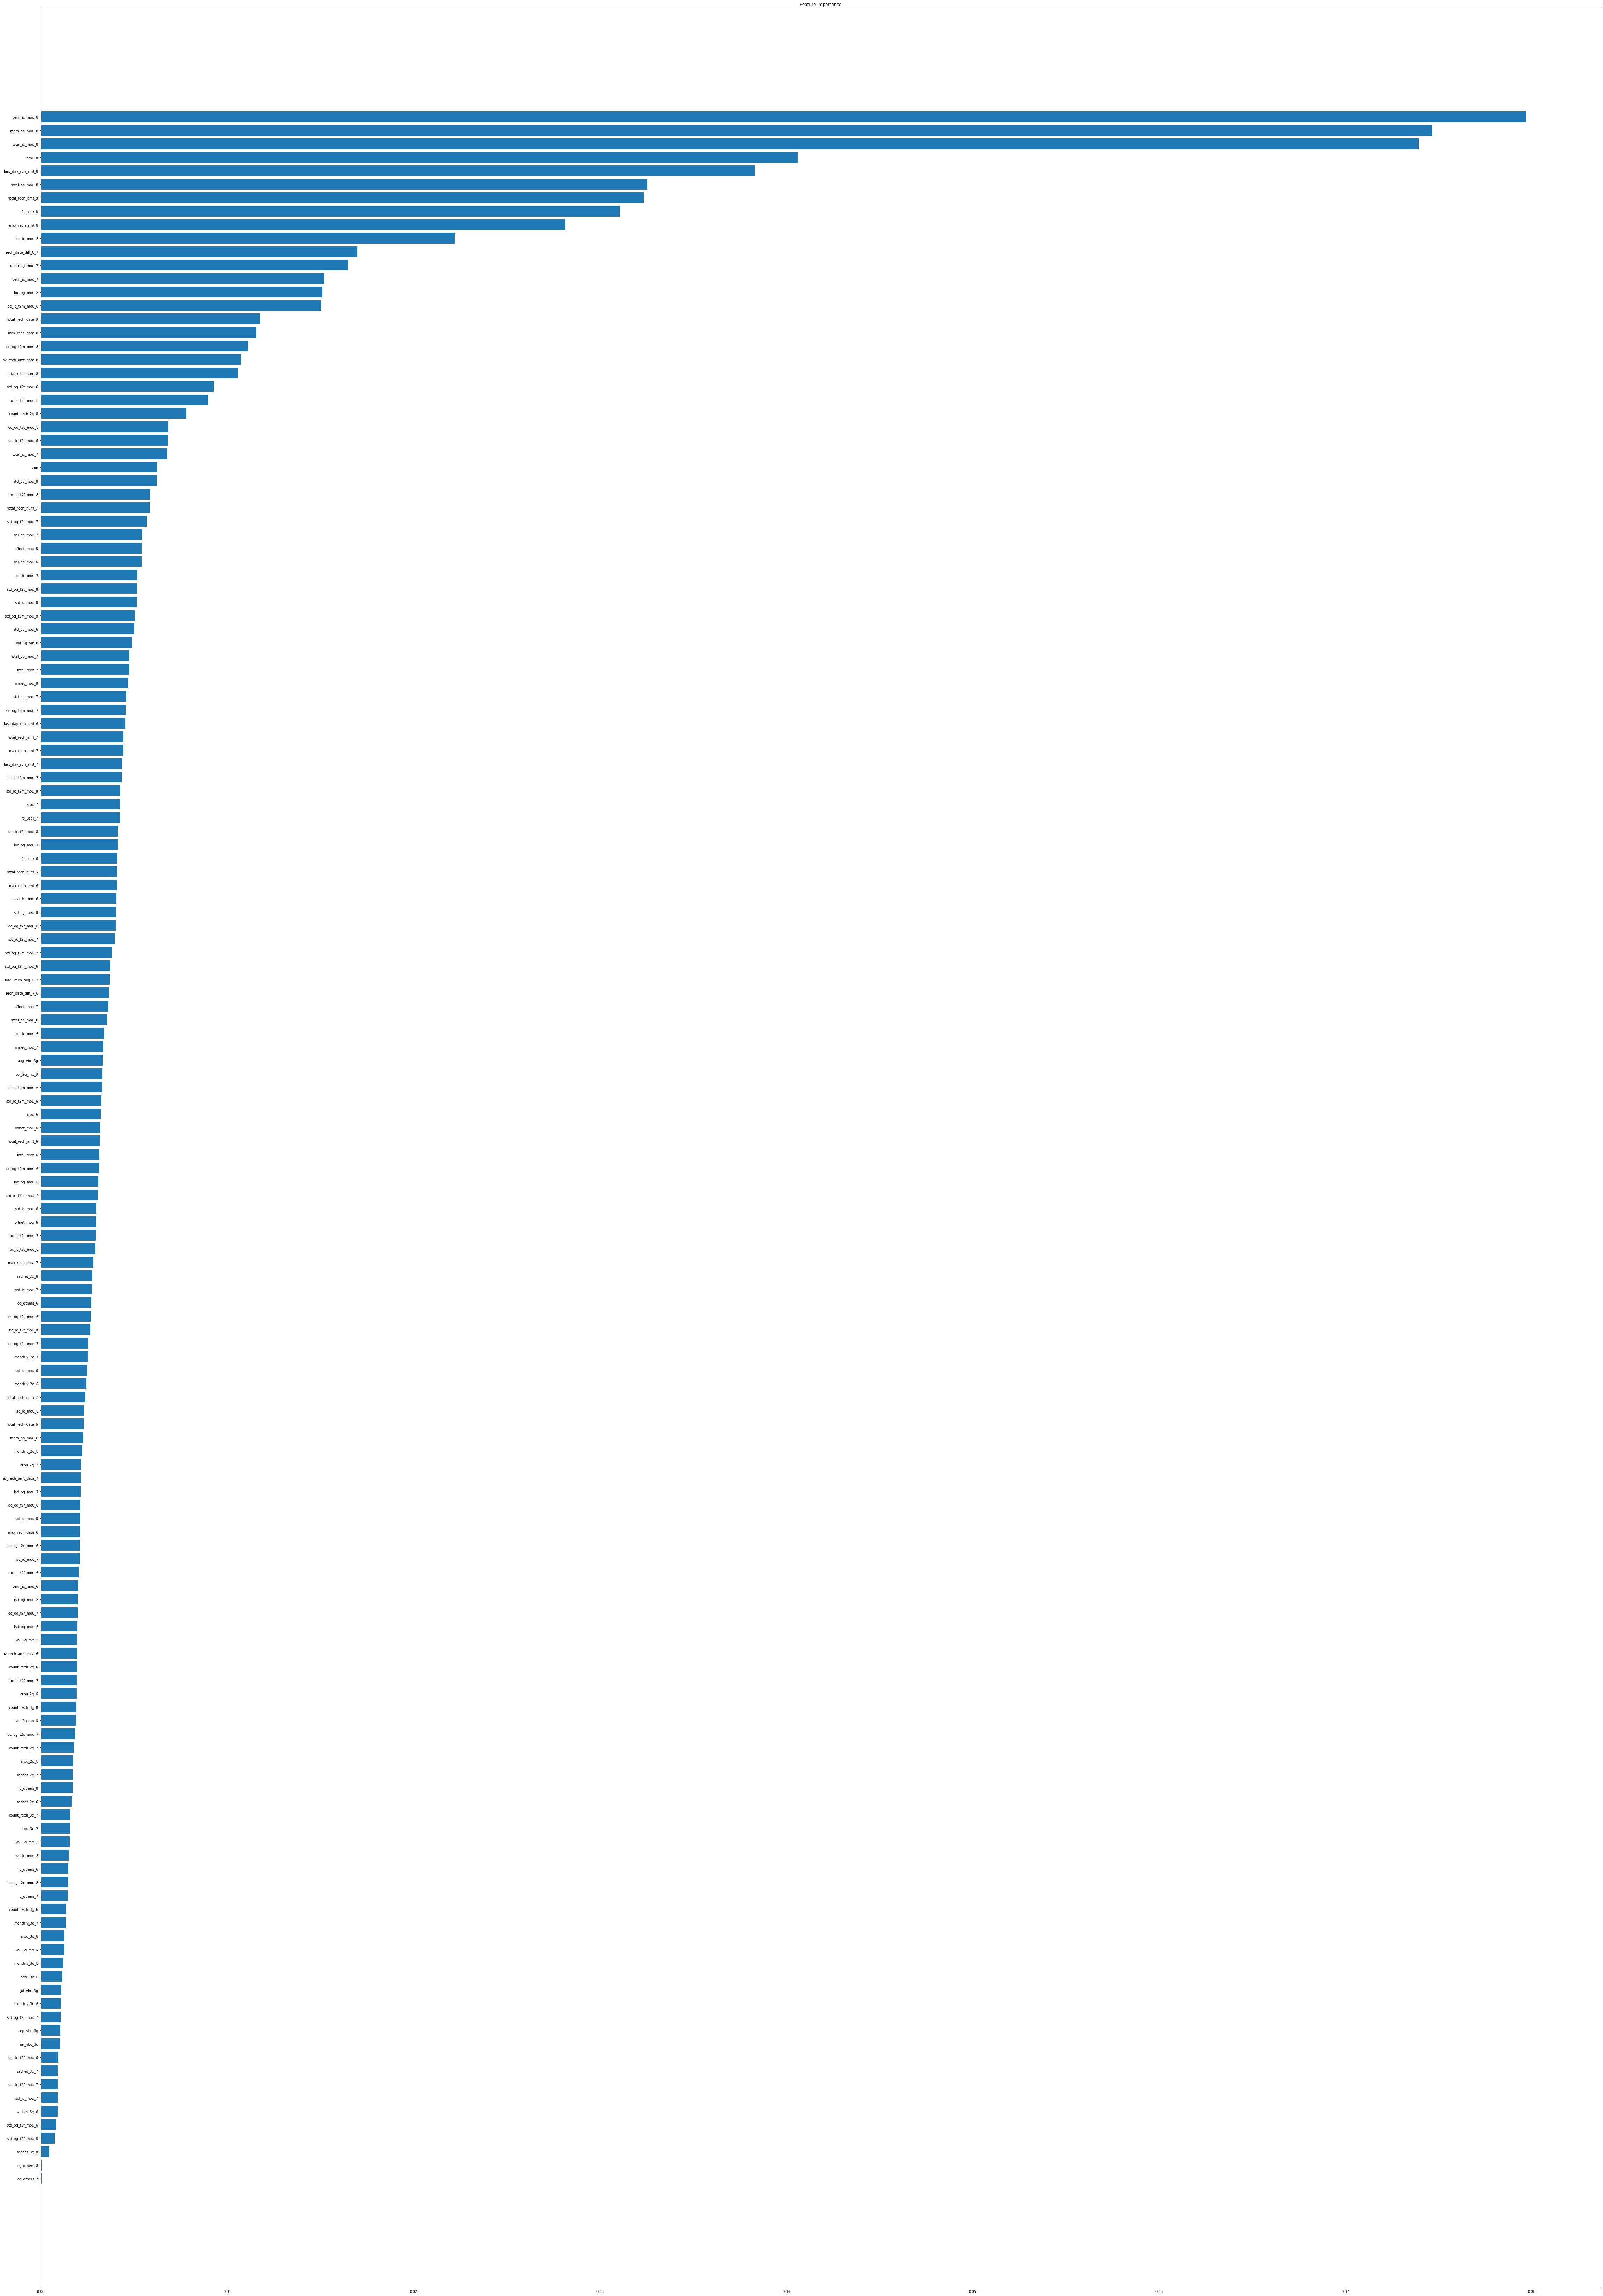

In [42]:
#Calculating feature importances
importances = final_Model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [telkom_df.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(80,120))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()

In [43]:

# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [44]:
pred(final_Model,X_test,y_test)

CONFUSION MATRIX ------->> 
col_0     0    1
churn           
0      7855  249
1       210  342

Classification paradox :------->>
Accuracy :-  94.7

Specificity //  True Negative Rate :-  96.93

Sensivity // True Positive Rate // Recall :-  61.96

False Negative Rate :-  38.04

False Postive Rate :-  3.07

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8104
           1       0.58      0.62      0.60       552

    accuracy                           0.95      8656
   macro avg       0.78      0.79      0.79      8656
weighted avg       0.95      0.95      0.95      8656



### Model 4 : PCA with Logistic Regression

In [45]:
training_data, testing_data = train_test_split(telkom_df, train_size=0.7, test_size=0.3)

In [46]:
Y_train = training_data["churn"]
training_data.pop("churn")
X_train = training_data

In [47]:
# Use PCA
pca = PCA(svd_solver="randomized", random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [48]:
pca.components_

array([[ 1.13465076e-01,  1.34455180e-01,  1.27739092e-01, ...,
         1.08067751e-01,  6.99034752e-05, -5.90224957e-05],
       [ 1.19632371e-01,  1.28987935e-01,  1.29040270e-01, ...,
         2.29954722e-01,  1.48858894e-05,  9.53583986e-05],
       [ 1.06125360e-01,  9.81135836e-02,  1.13574970e-01, ...,
         1.06657321e-01, -5.16525307e-05,  4.05920780e-05],
       ...,
       [-0.00000000e+00, -1.64046471e-18,  2.76200240e-18, ...,
         5.32434249e-04, -9.56305205e-18,  2.37371415e-17],
       [-0.00000000e+00,  3.08796092e-18,  2.02207480e-18, ...,
        -2.81180215e-05, -7.34078917e-17,  1.00618660e-16],
       [-0.00000000e+00, -3.30218813e-18, -8.29910827e-18, ...,
         7.65878145e-04,  4.09591548e-17,  6.87075645e-17]])

In [49]:
pca.explained_variance_ratio_

array([2.40745105e-01, 2.10504286e-01, 1.00991849e-01, 6.07795848e-02,
       5.45117134e-02, 4.94725247e-02, 4.64812539e-02, 2.83045614e-02,
       2.78284542e-02, 2.37225950e-02, 1.82635157e-02, 1.58658778e-02,
       1.41915816e-02, 1.06072100e-02, 9.66103807e-03, 8.61983910e-03,
       6.88304550e-03, 6.55467868e-03, 5.40621962e-03, 4.46223422e-03,
       4.09747805e-03, 3.86281543e-03, 3.81534615e-03, 3.51154932e-03,
       3.39202296e-03, 3.15720415e-03, 2.94178575e-03, 2.47809198e-03,
       2.39096410e-03, 1.98062685e-03, 1.86724039e-03, 1.45870331e-03,
       1.42540432e-03, 1.33262883e-03, 1.24137536e-03, 1.21547663e-03,
       1.13132917e-03, 1.09912214e-03, 9.24123784e-04, 8.77715211e-04,
       7.57190822e-04, 7.31281605e-04, 6.82359583e-04, 6.45990812e-04,
       6.21159081e-04, 5.97879857e-04, 5.85456407e-04, 5.69258476e-04,
       4.86638867e-04, 4.76815177e-04, 4.54119206e-04, 4.20436072e-04,
       3.91410823e-04, 3.56924241e-04, 3.41422812e-04, 3.21183686e-04,
      

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2407451 , 0.45124939, 0.55224124, 0.61302082, 0.66753254,
       0.71700506, 0.76348632, 0.79179088, 0.81961933, 0.84334193,
       0.86160544, 0.87747132, 0.8916629 , 0.90227011, 0.91193115,
       0.92055099, 0.92743404, 0.93398871, 0.93939493, 0.94385717,
       0.94795465, 0.95181746, 0.95563281, 0.95914436, 0.96253638,
       0.96569358, 0.96863537, 0.97111346, 0.97350443, 0.97548505,
       0.97735229, 0.978811  , 0.9802364 , 0.98156903, 0.9828104 ,
       0.98402588, 0.98515721, 0.98625633, 0.98718046, 0.98805817,
       0.98881536, 0.98954664, 0.990229  , 0.99087499, 0.99149615,
       0.99209403, 0.99267949, 0.99324875, 0.99373539, 0.9942122 ,
       0.99466632, 0.99508676, 0.99547817, 0.99583509, 0.99617652,
       0.9964977 , 0.99681641, 0.9971187 , 0.99738443, 0.99760088,
       0.99780041, 0.99799326, 0.99815675, 0.9983063 , 0.99844236,
       0.99857704, 0.99870766, 0.9988343 , 0.99895307, 0.99906381,
       0.99917032, 0.99926437, 0.99935322, 0.9994373 , 0.99950

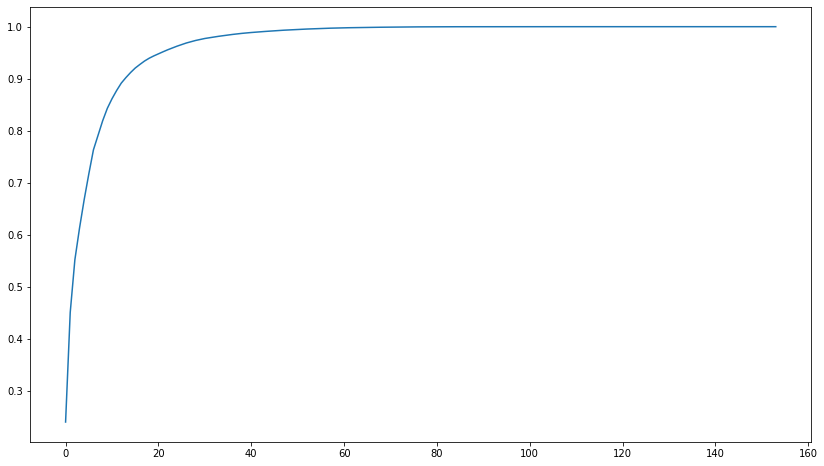

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [52]:
#From the above graph we could see that n_components as 30 will define 90% variance

In [55]:
pca = IncrementalPCA(n_components=30)

In [56]:
X_train_pca = pca.fit_transform(X_train)

In [57]:
logistic_regression = LogisticRegression()
model_pca = logistic_regression.fit(X_train_pca,Y_train)

In [58]:
Y_test = testing_data["churn"]
testing_data.pop("churn")
X_test = testing_data

In [59]:
X_test_pca = pca.fit_transform(X_test)

In [60]:
Y_test_predict = model_pca.predict(X_test_pca)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_predict, Y_test)

0.9158964879852126

### Model 5 : PCA with Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = telkom_df.drop(['churn'],axis=1)
y = telkom_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 0.48131488 -0.30263129 -1.19476022 ... -0.22404284  0.28370346
  -1.11274708]
 [ 0.28670935  0.07851464 -0.00233442 ...  0.71085014  0.10425933
   0.02177335]
 [-0.71698211 -0.62209069 -0.90875015 ... -0.58683713 -0.43407306
   0.39994683]
 ...
 [-0.82226552 -0.36542171  0.25058091 ... -0.54342584  0.28370346
   1.53446726]
 [ 1.20930724  1.76810506  1.06609573 ...  1.67571757  0.10425933
   0.21086009]
 [ 0.03899197 -0.47655201 -0.94683348 ... -0.56306428  1.18092411
  -2.05818077]]


In [63]:
pca = IncrementalPCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [64]:
# Fitting the decision tree with default hyperparameters

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train_pca,y_train)

dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
X_test_pca = pca.transform(X_test)
y_pred_default = dt_default.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8104
           1       0.21      0.71      0.33       552

    accuracy                           0.81      8656
   macro avg       0.59      0.77      0.61      8656
weighted avg       0.93      0.81      0.86      8656



In [66]:
# Printing accuracy
print(accuracy_score(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))


0.8137707948243993
[[6651 1453]
 [ 159  393]]


In [67]:
# GridSearchCV to find optimal max_depth


# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [68]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


best accuracy 0.8328412334487396
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [69]:
# model with optimal hyperparameters
final_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
final_model.fit(X_train_pca, y_train)
predictions = final_model.predict(X_test_pca)
# accuracy score
print('Model Accuracy score : ',final_model.score(X_test_pca,y_test))
print(confusion_matrix(y_test,predictions))

Model Accuracy score :  0.9338031423290203
[[7993  111]
 [ 462   90]]


### Model 6 : PCA with Random Forest Classifier

In [70]:
# train test split and over_sampling
X = telkom_df.drop(['churn'],axis=1)
y = telkom_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Running pca with n_componnets as 30 (derived from above)
pca = IncrementalPCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_sample(X_train_pca,y_train)



In [71]:
#Random Forest Model (fitting with defalut hyper parameters)
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

X_test_pca = pca.transform(X_test)



In [72]:
predictions = rf_model.predict(X_test_pca)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print('Model Accuracy score : ',final_model.score(X_test_pca,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      8104
           1       0.39      0.49      0.44       552

    accuracy                           0.92      8656
   macro avg       0.68      0.72      0.70      8656
weighted avg       0.93      0.92      0.92      8656

[[7682  422]
 [ 281  271]]
Model Accuracy score :  0.9338031423290203


In [73]:
# Tuning the hyper parameters

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 20.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [74]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8520852657313932 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [75]:
# building model with optimal parameters.
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)

rfc_final.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
# predicting on test data
predictions = rfc_final.predict(X_test_pca)

In [78]:
# performance metrics
print(classification_report(y_test,predictions))
print('Confusion matrix : ',confusion_matrix(y_test,predictions))
print('Model Accuracy score : ',final_model.score(X_test_pca,y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8104
           1       0.29      0.74      0.42       552

    accuracy                           0.87      8656
   macro avg       0.63      0.81      0.67      8656
weighted avg       0.94      0.87      0.89      8656

Confusion matrix :  [[7092 1012]
 [ 142  410]]
Model Accuracy score :  0.9338031423290203


## Analysis

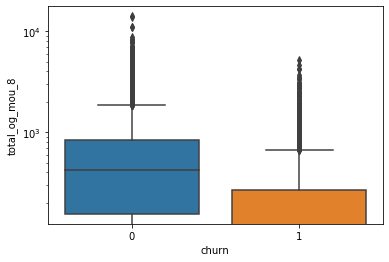

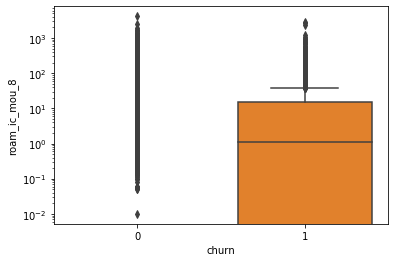

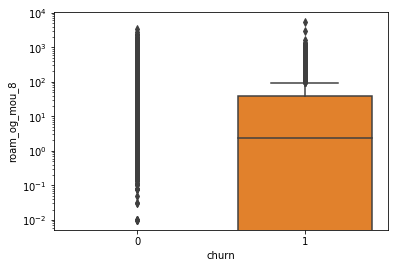

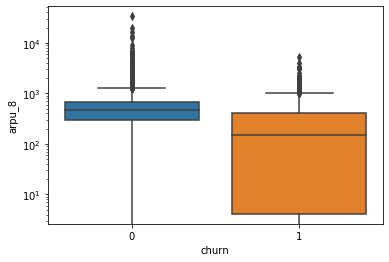

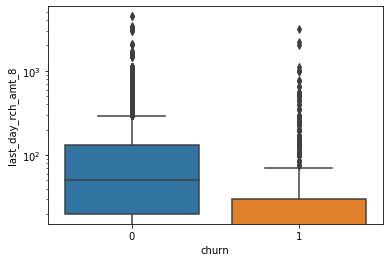

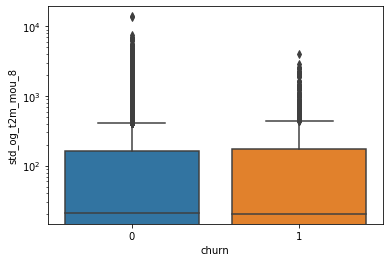

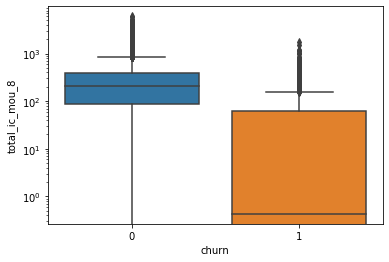

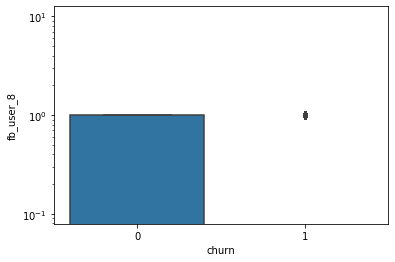

In [79]:
major_efficient_col = ['total_og_mou_8','roam_ic_mou_8','roam_og_mou_8','arpu_8','last_day_rch_amt_8',
                       'std_og_t2m_mou_8','total_ic_mou_8','fb_user_8']
for col in major_efficient_col:
    fig, ax = plt.subplots()
    sns.boxplot(x='churn', y=col, data=telkom_df)
    plt.yscale('log')
    plt.show()
    

## Major affecting KPI

- total_og_mou_8 : Total outgoing calls minutes of usage in 8th month.
- roam_ic_mou_8 : raom incoming minutes of usage in 8th month.
- roam_og_mou_8 : roam outgoing minutes of usage in 8th month.
- arpu_8 : Average revenue per user in 8th month.
- last_day_rech_amt_8 : last recharge amount in 8th month.
- std_og_t2m_mou_8 : STD outgoing calls t2m (Operator T to other operator mobile) minutes of usage in 8th month.
- total_ic_mou_8 : Total incoming calls minutes of usage in 8th month.
- fb_user_8 : Availing facebook and other social networking services.
- std_og_mou_8  : STD outgoing calls minutes of usage in 8th month.


## Efficient Churn Indicators and Recommendations.

- User is more likely to churn if roam_ic_mou_8,roam_og_mou_8 increases significantly.
  Recommendation : To give user roaming offers.
- User is more likely to churn if he stops using fb_user_8 (Social networkig services) services.
  Recommendation : To give user data pack/ social networking offers.
- User is more likely to churn if total_ic_mou_8 and total_og_mou_8 decreases significantly.
  Recommendation : To give user incoming/outgoing call offers.
- User is more likely to churn if last_day_rec_amt_8 decreases significantly.
- User is more likely to churn if arpu_8 decreases significantly.


 ## Best Models:
 - For Interpretation : Random Forest Classifier
 - For Accuracy : PCA with Random Forest Classifier